# Проверка гипотезы в Python и составление аналитической записки

- Автор:Яфаров Ринат
- Дата:22.03.2025

## Цели и задачи проекта

Основная цель проекта — анализ данных об использовании сервиса Яндекс Книги для получения ценной информации о поведении пользователей, их предпочтениях в чтении и прослушивании контента, а также выявление факторов, влияющих на вовлеченность и длительность сессий. 

## Описание данных

Набор данных содержит информацию об активности пользователей в сервисе Яндекс Книги за период с 1 сентября по 11 декабря 2024 года. Данные включают в себя информацию о чтении и прослушивании контента, а также характеристики пользователей, контента, авторов и географического положения.

**Таблицы данных:**

1.  **`bookmate.audition` (Данные об активности пользователей):**
    *   **Описание:** Содержит данные о каждой сессии чтения или прослушивания контента пользователем.
    *   **Поля:**
        *   <mark>`audition_id`</mark>: Уникальный идентификатор сессии.
        *   <mark>`puid`</mark>: Идентификатор пользователя.
        *   <mark>`usage_platform_ru`</mark>: Название платформы, использованной для прослушивания (например, iOS, Android, Web).
        *   <mark>`msk_business_dt_str`</mark>: Дата события в формате строки (московское время).
        *   <mark>`app_version`</mark>: Версия приложения, использованная для чтения или прослушивания.
        *   <mark>`adult_content_flg`</mark>: Флаг, указывающий, был ли контент предназначен для взрослых (`True` или `False`).
        *   <mark>`hours`</mark>: Длительность чтения или прослушивания в часах.
        *   <mark>`hours_sessions_long`</mark>: Продолжительность длинных сессий чтения или прослушивания в часах.
        *   <mark>`kids_content_flg`</mark>: Флаг, указывающий, был ли контент предназначен для детей (`True` или `False`).
        *   <mark>`main_content_id`</mark>: Идентификатор основного контента (книги, аудиокниги и т.д.).
        *   <mark>`usage_geo_id`</mark>: Идентификатор географического местоположения пользователя.

2.  **`bookmate.content` (Данные о контенте):**
    *   **Описание:** Содержит информацию о контенте, доступном в сервисе.
    *   **Поля:**
        *   <mark>`main_content_id`</mark>: Идентификатор основного контента.
        *   <mark>`main_author_id`</mark>: Идентификатор основного автора контента.
        *   <mark>`main_content_type`</mark>: Тип контента (например, "audiobook", "book").
        *   <mark>`main_content_name`</mark>: Название контента.
        *   <mark>`main_content_duration_hours`</mark>: Длительность контента в часах.
        *   <mark>`published_topic_title_list`</mark>: Список жанров контента (может содержать несколько жанров, разделенных запятыми).

3.  **`bookmate.author` (Данные об авторах):**
    *   **Описание:** Содержит информацию об авторах контента.
    *   **Поля:**
        *   <mark>`main_author_id`</mark>: Идентификатор основного автора контента.
        *   <mark>`main_author_name`</mark>: Имя основного автора контента.

4.  **`bookmate.geo` (Данные о местоположении):**
    *   **Описание:** Содержит информацию о географическом положении пользователей.
    *   **Поля:**
        *   <mark>`usage_geo_id`</mark>: Идентификатор географического положения.
        *   <mark>`usage_geo_id_name`</mark>: Город или регион географического положения.
        *   <mark>`usage_country_name`</mark>: Страна географического положения.


## Содержимое проекта
1.  **Постановка цели и задач**
2.  **Сбор и подготовка данных**
3.  **Статистическая проверка гипотез**
4.  **Анализ и интерпретация результатов**
5.  **Формулировка выводов и рекомендаций**


## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# Пустые ячейки после каждого задания — примерное пространство для работы.
# Вы можете свободно добавлять или удалять ячейки по своему усмотрению в зависимости от логики и объёма работы.

In [2]:
# Используйте ячейки типа Code для вашего кода

In [3]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')

In [5]:
df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [6]:
print("\nДубликаты в puid до удаления:")
df['puid'].duplicated().sum()


Дубликаты в puid до удаления:


244

In [7]:
df= df.drop_duplicates(subset='puid', keep='first') 

In [8]:
print("\nДубликаты в puid после удаления:")
print(df['puid'].duplicated().sum())


Дубликаты в puid после удаления:
0


In [9]:
msk_count = len(df[df['city'] == 'Москва'])
spb_count = len(df[df['city'] == 'Санкт-Петербург'])
print(f"\nКоличество пользователей из Москвы: {msk_count}")
print(f"Количество пользователей из Санкт-Петербурга: {spb_count}")


Количество пользователей из Москвы: 6234
Количество пользователей из Санкт-Петербурга: 2306


In [10]:
df[df['city'] == 'Санкт-Петербург']['hours'].describe()

count    2306.000000
mean       11.264433
std        39.831755
min         0.000025
25%         0.060173
50%         0.875355
75%         6.138424
max       978.764775
Name: hours, dtype: float64

In [11]:
df[df['city'] == 'Москва']['hours'].describe()

count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
max       857.209373
Name: hours, dtype: float64

## Вывод по преобработки данных

Обнаружено и удалено 244 дубликата в идентификаторах пользователей, что позволило повысить точность дальнейшего анализа.

Установлено, что количество пользователей из Москвы (6234) значительно превышает количество пользователей из Санкт-Петербурга (2306).

Среднее время активности пользователей в Санкт-Петербурге (11.26 часа) немного выше, чем в Москве (10.88 часа).

Медиана времени активности в Москве (0.92 часа) немного выше, чем в Санкт-Петербурге (0.88 часа).

Распределение времени активности в обоих городах характеризуется высоким стандартным отклонением и наличием выбросов (очень активных пользователей).

Доля "неактивных" пользователей (проводящих мало времени в сервисе) примерно одинакова в обоих городах.

Последствия неравных размеров групп:

1. Неравные размеры групп могут снизить статистическую мощность t-теста. Это означает, что тест может быть менее чувствителен к обнаружению реальной разницы между средними значениями, если она существует.
2. Некоторые тесты на равенство дисперсий очень чувствительны к отклонениям от нормальности, особенно когда размеры групп сильно различаются. В таких случаях тест Левена, который менее чувствителен к отклонениям от нормальности, является более предпочтительным.
3. При интерпретации результатов важно учитывать, что разница между средними значениями может быть статистически значимой, но не иметь практической значимости, особенно если меньшая группа имеет очень высокую дисперсию.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [12]:
msk_data = df[df['city'] == 'Москва']['hours']
spb_data = df[df['city'] == 'Санкт-Петербург']['hours']

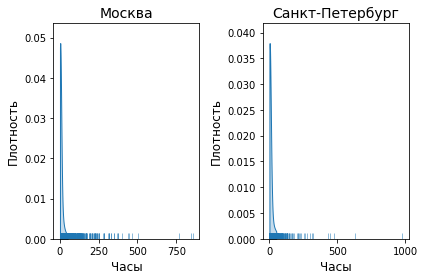

In [13]:
# Москва
plt.subplot(1, 2, 1)
sns.kdeplot(msk_data, fill=True, clip=(0, 50)) 
sns.rugplot(msk_data, alpha=0.5) 
plt.title('Москва', fontsize=14)
plt.xlabel('Часы', fontsize=12)
plt.ylabel('Плотность', fontsize=12)

# Санкт-Петербург
plt.subplot(1, 2, 2)
sns.kdeplot(spb_data, fill=True, clip=(0, 50))
sns.rugplot(spb_data, alpha=0.5) 
plt.title('Санкт-Петербург', fontsize=14)
plt.xlabel('Часы', fontsize=12)
plt.ylabel('Плотность', fontsize=12)

plt.tight_layout()
plt.show()

Оба распределения (Москва и Санкт-Петербург) имеют выраженную скошенность вправо. Это означает, что большинство пользователей проводят относительно небольшое количество времени в приложении, а небольшое количество пользователей проводит значительно больше времени (выбросы).

Оба распределения имеют пик вблизи нуля, что указывает на то, что много пользователей проводят очень мало времени в приложении.

На основе визуальной оценки, распределения явно не являются нормальными. Они далеки от колоколообразной формы, характерной для нормального распределения.

Условия для применения t-теста:

* Наблюдения в обеих выборках должны быть независимыми друг от друга. Это условие выполняется, поскольку каждый пользователь вносит свой вклад в данные независимо от других.
* Данные в каждой выборке должны быть приблизительно нормально распределены. Это условие, судя по визуализациям, не выполняется. Распределения имеют выраженную скошенность вправо и пик вблизи нуля.
* Дисперсии в обеих выборках должны быть примерно равны. Если дисперсии значительно различаются, следует использовать t-тест Уэлча, который не требует этого условия. Это условие нужно проверить тестом Левена.
* Данные должны быть измерены в количественной шкале (интервальной или отношений). Это условие выполняется, так как "часы активности" - количественная переменная.


Почему я сомневаюсь в использовании t-теста в данном случае?

Главная причина - нарушение условия нормальности. Хотя t-тест довольно устойчив к небольшим отклонениям от нормальности (особенно при больших размерах выборки), в нашем случае скошенность распределений довольно сильная.

Можем ли использовать t-тест, несмотря на нарушение нормальности?
Учитывая сильную скошенность распределений и наличие выбросов - НЕТ

Вывод:

В силу того, что результаты могут быть не совсем надежными из-за сильного отклонения от нормальности мы не можем использовать t-test. Поэтому более надежным подходом будет использование непараметрического теста Манна-Уитни.

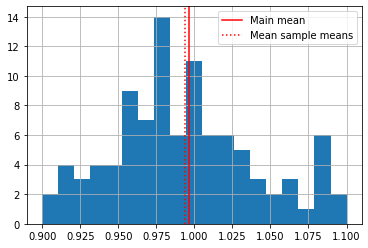

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
main_size = 40_000
sample_size = main_size // 100
main_population = np.random.exponential(size=main_size)
sample_means = pd.Series([np.mean(np.random.choice(main_population, size=sample_size)) for i in range(100)])

ax = sample_means.hist(bins=np.linspace(0.9, 1.1, 20))
ax.axvline(main_population.mean(), c='r', label="Main mean")
ax.axvline(sample_means.mean(), c='r', ls=":", label="Mean sample means")
ax.legend()
plt.show()

Основные условия проведения u-теста:
* Тест не требует, чтобы данные были нормально распределены.
* Он используется для сравнения двух независимых групп (в нашем случае, пользователи из Москвы и Санкт-Петербурга).
* Используем односторонний вариант теста, так как наша альтернативная гипотеза заключается в том, что пользователи из Санкт-Петербурга проводят больше времени в приложении, чем пользователи из Москвы.

Все условия подходят для нашего случая

In [15]:
alpha = 0.05 # Уровень значимости
results = stats.mannwhitneyu(spb_data, msk_data, alternative='greater') 
print("p-value:", results.pvalue)

# Интерпретация результатов
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг, чем пользователи из Москвы.")
else:
    print("Не можем отвергнуть нулевую гипотезу. Нет достаточных оснований утверждать, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг, чем пользователи из Москвы.")

p-value: 0.6189600878052618
Не можем отвергнуть нулевую гипотезу. Нет достаточных оснований утверждать, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг, чем пользователи из Москвы.


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



## Аналитическая записка: Сравнение активности пользователей Яндекс Книги в Москве и Санкт-Петербурге

Анализ распределения данных:
* Визуализированы распределения времени активности пользователей для Москвы и Санкт-Петербурга с использованием графиков плотности.
* Установлено, что распределения имеют выраженную скошенность вправо и не соответствуют нормальному распределению.

Выбор статистического теста:
* На основании ненормального распределения данных был выбран непараметрический тест Манна-Уитни (Mann-Whitney U test) для сравнения двух независимых групп.
* Использовался односторонний вариант теста, так как проверялась гипотеза о том, что пользователи из Санкт-Петербурга проводят больше времени, чем пользователи из Москвы.

Уровень статистической значимости:
* Установлен уровень статистической значимости alpha = 0.05. 

Интерпретация результатов:
* Полученное значение p-value (0.61896) значительно превышает установленный уровень значимости (alpha = 0.05). На основании этого мы не можем отвергнуть нулевую гипотезу. 
* Это означает, что у нас нет достаточных статистических оснований утверждать, что пользователи из Санкт-Петербурга в среднем проводят больше времени за чтением и прослушиванием книг в приложении Яндекс Книги, чем пользователи из Москвы.

Возможные причины:
* Возможно, размер выборки недостаточно велик или разброс данных слишком велик, чтобы выявить существующие различия. Даже если небольшое различие и существует, тест не смог его обнаружить.
* Вполне возможно, что реальной разницы в среднем времени активности пользователей между двумя городами и не существует. Возможно, культурные или социальные факторы, влияющие на чтение и прослушивание книг, в Москве и Санкт-Петербурге схожи.
* На активность пользователей могут влиять другие факторы, которые не были учтены в данном анализе, например: возраст, пол, интересы, уровень образования, доступность других видов досуга, сезонность и т.д.

Заключение:
* Проведенный анализ не подтвердил гипотезу о том, что пользователи из Санкт-Петербурга в среднем проводят больше времени за чтением и прослушиванием книг в приложении Яндекс Книги, чем пользователи из Москвы